# AdaDelta Implementation

... loading data
... building the model
... training
training @ iter =  0
epoch 1, minibatch 100/100, validation error 9.230000 %
     epoch 1, minibatch 100/100, test error of best model 9.520000 %
training @ iter =  100
epoch 2, minibatch 100/100, validation error 6.180000 %
     epoch 2, minibatch 100/100, test error of best model 6.500000 %
training @ iter =  200
epoch 3, minibatch 100/100, validation error 4.640000 %
     epoch 3, minibatch 100/100, test error of best model 4.850000 %
training @ iter =  300
epoch 4, minibatch 100/100, validation error 3.500000 %
     epoch 4, minibatch 100/100, test error of best model 3.910000 %
training @ iter =  400
epoch 5, minibatch 100/100, validation error 3.020000 %
     epoch 5, minibatch 100/100, test error of best model 3.260000 %
training @ iter =  500
epoch 6, minibatch 100/100, validation error 2.780000 %
     epoch 6, minibatch 100/100, test error of best model 2.800000 %
training @ iter =  600
epoch 7, minibatch 100/100, validation

The code for file convolutional_mlp_class2.pyc ran for 344.48m
The code for file convolutional_mlp_class2.pyc ran for 175.58m


Best validation score of 0.940000 % obtained at iteration 4600, with test performance 0.950000 %


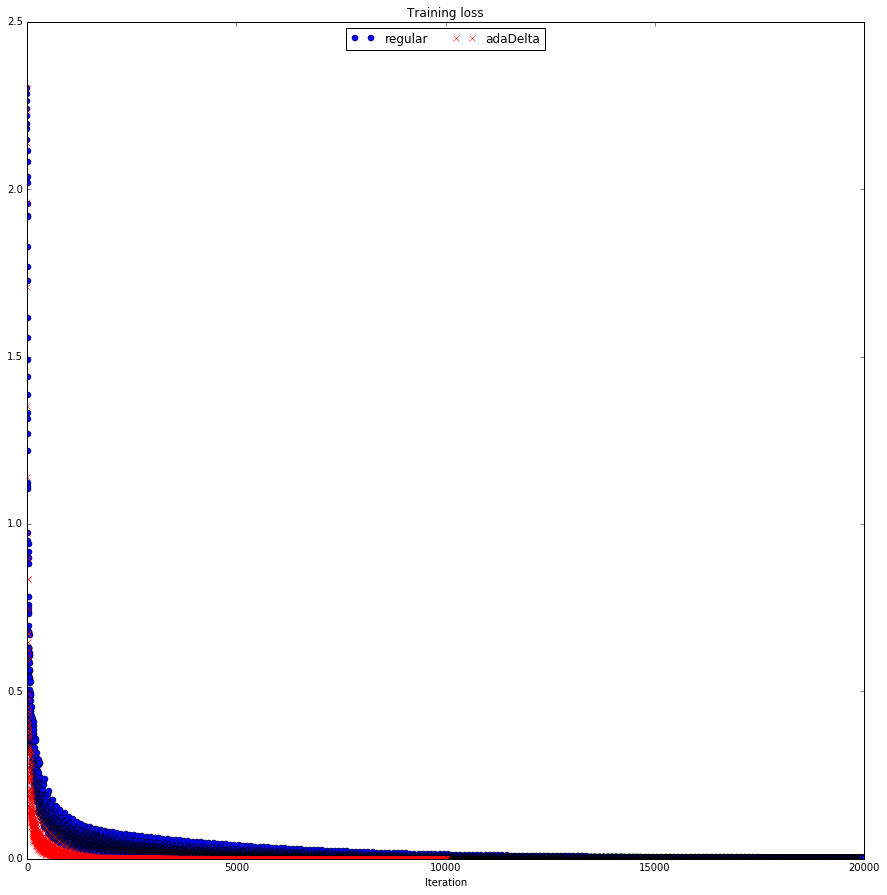

In [88]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import convolutional_mlp_class2 as conv
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.title('Training loss')
plt.xlabel('Iteration')

lenet5 = conv.lenet5(update_rule='regular')
lenet5.train(n_epochs=200)
plt.plot(lenet5.loss_history,'bo',label='regular')

lenet5 = conv.lenet5(update_rule='adaDelta')
lenet5.train(n_epochs=200)
plt.plot(lenet5.loss_history, 'rx', label='adaDelta')

plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show() 


**Conclusion:** the final validation and test error after 200 iterations don't vary much, but adaDelta shows faster convergence.

In [ ]:
lenet5 = conv.lenet5(update_rule='adaDelta')
lenet5.train(n_epochs=25)


... loading data
... building the model
... training

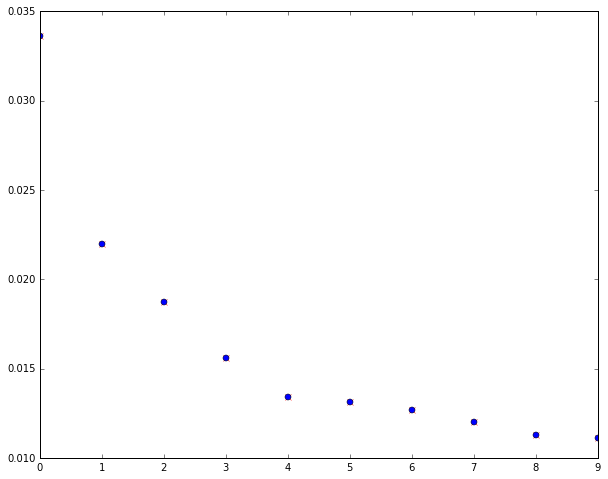

In [96]:
plt.plot(lenet5.train_error_history, 'rx', label='train error')
plt.plot(lenet5.val_error_history, 'bo', label='validation error')